# Data-X Spring 2018
## Homework 3: Diego Sapunar
References:
* IEOR135/IEOR290: Data-X Respository
* Tensorflow Documentation
* Scikit-learn Documentation
* https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/logistic_regression.py

## PART I

## PART II

1 . Train a multiclass logistic regression model (softmax regression is a good choice) on the DIGITS dataset in tensorflow. You will create input and output placeholders, define the model initializing weight and bias variables, then define a loss function for the model. Once you create a blueprint of the model, compile or train the model to minimize the loss function. Use minibatch gradient descent to train the model, and use the hyperparameters: batch_size=100, epochs=200, learning rate=.001 .
Report accuracy on 20% validation data. Plot the training accuracy vs epoch and plot validation accuracy vs epoc. Show your network graph as seen on tensorboard. (40p)

## Import

In [14]:
# Import packages

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow.examples.tutorials.mnist.mnist as mnist_info

from IPython.display import clear_output, Image, display, HTML

In [15]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script src="//cdnjs.cloudflare.com/ajax/libs/polymer/0.3.3/platform.js"></script>
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

## Contruction Phase

In [17]:
# Clear the symbolic graph
tf.reset_default_graph()

In [18]:
# Hyperparametes
learning_rate = 0.001
training_epochs = 200
batch_size = 100
num_features = 784
num_labels = 10

In [19]:
# Define input
x = tf.placeholder(tf.float32,shape = [None,784]) 
# None, because we don't specify how many examples we'll look at

W = tf.Variable(tf.zeros([784, 10])) # number of weights
b = tf.Variable(tf.zeros([10])) # number of bias terms

In [20]:
# initialize a tensorflow graph
graph = tf.Graph()

In [21]:
# Placeholders
x = tf.placeholder(tf.float32, [None, num_features]) # Input Placeholder
y = tf.placeholder(tf.float32, [None, num_labels]) # Outout Placeholder / correct answers

# Variables
W = tf.Variable(tf.zeros([num_features, num_labels])) # Weights
b = tf.Variable(tf.zeros([num_labels])) # biases

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Execution Phase

In [27]:
training_accuracy = []
val_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Loop over epochs
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Training Loop
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            avg_cost += c / total_batch
            
        # Test model
        correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

        acc_train = accuracy.eval(feed_dict={x: batch_xs, y: batch_ys})
        acc_val = accuracy.eval(feed_dict={x: mnist.validation.images,
                                        y: mnist.validation.labels})
        print(epoch +1, "Train accuracy:", acc_train, "Val accuracy:", acc_val)

        training_accuracy.append(acc_train)
        val_accuracy.append(acc_val)
        print()

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    


1 Train accuracy: 0.78 Val accuracy: 0.7632

2 Train accuracy: 0.75 Val accuracy: 0.789

3 Train accuracy: 0.78 Val accuracy: 0.8008

4 Train accuracy: 0.88 Val accuracy: 0.8144

5 Train accuracy: 0.85 Val accuracy: 0.826

6 Train accuracy: 0.87 Val accuracy: 0.8338

7 Train accuracy: 0.85 Val accuracy: 0.8396

8 Train accuracy: 0.84 Val accuracy: 0.8444

9 Train accuracy: 0.83 Val accuracy: 0.848

10 Train accuracy: 0.91 Val accuracy: 0.8514

11 Train accuracy: 0.81 Val accuracy: 0.8538

12 Train accuracy: 0.86 Val accuracy: 0.8558

13 Train accuracy: 0.85 Val accuracy: 0.858

14 Train accuracy: 0.81 Val accuracy: 0.8596

15 Train accuracy: 0.89 Val accuracy: 0.863

16 Train accuracy: 0.8 Val accuracy: 0.8646

17 Train accuracy: 0.83 Val accuracy: 0.866

18 Train accuracy: 0.84 Val accuracy: 0.8672

19 Train accuracy: 0.87 Val accuracy: 0.8686

20 Train accuracy: 0.87 Val accuracy: 0.87

21 Train accuracy: 0.88 Val accuracy: 0.8728

22 Train accuracy: 0.88 Val accuracy: 0.8732

23 Tra

180 Train accuracy: 0.89 Val accuracy: 0.9102

181 Train accuracy: 0.91 Val accuracy: 0.9102

182 Train accuracy: 0.94 Val accuracy: 0.911

183 Train accuracy: 0.9 Val accuracy: 0.9106

184 Train accuracy: 0.93 Val accuracy: 0.9112

185 Train accuracy: 0.91 Val accuracy: 0.9112

186 Train accuracy: 0.93 Val accuracy: 0.9112

187 Train accuracy: 0.91 Val accuracy: 0.9112

188 Train accuracy: 0.89 Val accuracy: 0.9112

189 Train accuracy: 0.93 Val accuracy: 0.9112

190 Train accuracy: 0.88 Val accuracy: 0.9112

191 Train accuracy: 0.92 Val accuracy: 0.9114

192 Train accuracy: 0.91 Val accuracy: 0.911

193 Train accuracy: 0.88 Val accuracy: 0.9114

194 Train accuracy: 0.92 Val accuracy: 0.9112

195 Train accuracy: 0.89 Val accuracy: 0.911

196 Train accuracy: 0.96 Val accuracy: 0.911

197 Train accuracy: 0.89 Val accuracy: 0.9114

198 Train accuracy: 0.89 Val accuracy: 0.9114

199 Train accuracy: 0.93 Val accuracy: 0.9124

200 Train accuracy: 0.92 Val accuracy: 0.9128

Optimization Finis

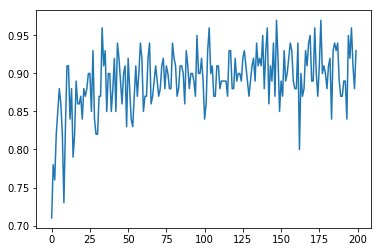

In [11]:
plt.plot(range(training_epochs), training_accuracy)


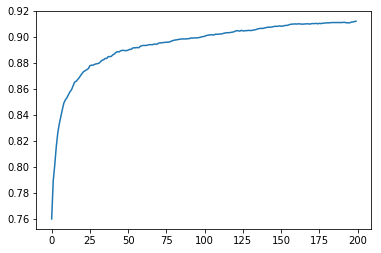

In [12]:
plt.plot(range(training_epochs), val_accuracy)

In [13]:
show_graph(tf.get_default_graph())

2.. Now using the same technique as in the above multiclass logistic regression model, train a vanilla Dense Neural Network using the DIGITS dataset, with the characteristics listed below. Observe that the complexity of a Neural Network depends on the additional layers called 'Hidden Layers', which can extract relevant features and latent information in the data. Compare the number of weights and bias terms (model parameters) in the DNN with the parameters in the simple multiclass logistic regression model that you trained in the above question.[100p]


## CONSTRUCTION PHASE

In [67]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [68]:
mnist.train.images.shape

(55000, 784)

In [69]:
# Define hyperparameters and input size

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 10

In [70]:
# Reset graph
tf.reset_default_graph()

In [71]:
# Placeholders for data (inputs and targets)
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [72]:
def neuron_layer(X, n_neurons, name, activation=None):
    # X input to neuron
    # number of neurons for the layer
    # name of layer
    # pass in eventual activation function
    
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        
        # initialize weights to prevent vanishing / exploding gradients
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        
        # Initialize weights for the layer
        W = tf.Variable(init, name="weights")
        # biases
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        
        # Output from every neuron
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [73]:
# Define the hidden layers
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.tanh)
    
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.tanh)
    
    hidden3 = neuron_layer(hidden2, n_hidden3, name="hidden3",
                           activation=tf.tanh)
        
    logits = neuron_layer(hidden3, n_outputs, name="outputs")

In [74]:
# Define loss function (that also optimizes Softmax for output):

with tf.name_scope("loss"):
    # logits are from the last output of the dnn
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [75]:
# Training step with Gradient Descent

learning_rate = 0.001

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [76]:
# Evaluation to see accuracy

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [77]:
show_graph(tf.get_default_graph())

## Evaluation Phase

## Train Steps


In [78]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 1000
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                            y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy:", acc_val)


InvalidArgumentError: labels must be 1-D, but got shape [100,10]
	 [[Node: loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/outputs/add, _arg_y_0_1)]]

Caused by op 'loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits', defined at:
  File "/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 112, in start
    self.asyncio_loop.run_forever()
  File "/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/base_events.py", line 1431, in _run_once
    handle._run()
  File "/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 102, in _handle_events
    handler_func(fileobj, events)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-74-17418278bb73>", line 6, in <module>
    logits=logits)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 2042, in sparse_softmax_cross_entropy_with_logits
    precise_logits, labels, name=name)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 4753, in _sparse_softmax_cross_entropy_with_logits
    labels=labels, name=name)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/Users/diegosapunar/.virtualenvs/data-x/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): labels must be 1-D, but got shape [100,10]
	 [[Node: loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits = SparseSoftmaxCrossEntropyWithLogits[T=DT_FLOAT, Tlabels=DT_INT64, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/outputs/add, _arg_y_0_1)]]


In [79]:
mnist.train.images.shape

(55000, 784)